In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
plt.rcParams['font.size']=14

In [3]:
#misure di tempo e spazio percorso nel caso di un moto con velocita' uniforme
#s = v * t + s0
#(valori simulati con v = 12 mm/s e assumendo sigma_s = 2 mm e s0 = 2 mm)

In [4]:
t = np.array([0, 1, 2, 3, 4, 5]) #tempo in secondi
s = np.array([2, 17, 27, 37, 47, 63])#spazio in mm
sigma_s = 2 #incertezza su s in mm (uguale in tutte le misure)


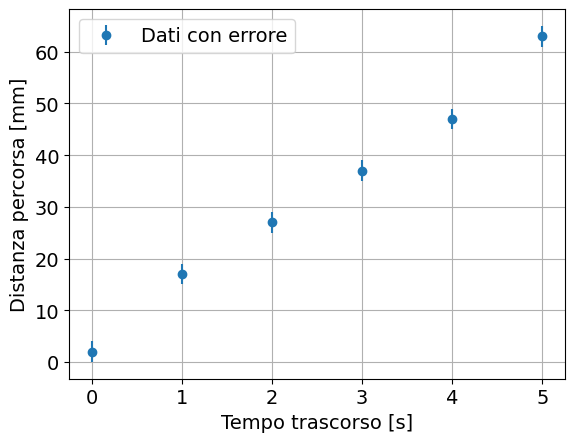

In [5]:
plt.errorbar(t, s, yerr=sigma_s, fmt='o', label='Dati con errore')
plt.xlabel('Tempo trascorso [s]')
plt.ylabel('Distanza percorsa [mm]')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
#uso la legge s = v * t + s0 e voglio determinare v e s0

In [7]:
N = len(t)
Sx = np.sum(t)
Sy = np.sum(s)
Sxx = np.sum(t * t)
Sxy = np.sum(t * s)

den = N * Sxx - Sx**2
m = (N * Sxy - Sx * Sy) / den
q = (Sxx * Sy - Sx * Sxy) / den

In [8]:
s_fit = m * t + q
print(f"stima di m: {m:.2f} [1/s], stima di q: {q:.2f} [mm]")

stima di m: 11.57 [1/s], stima di q: 3.24 [mm]


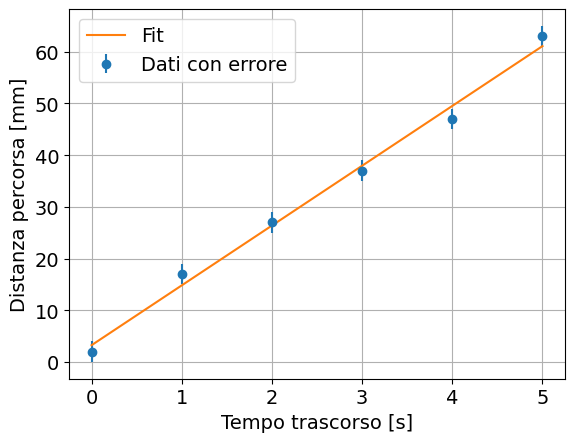

In [9]:
plt.errorbar(t, s, yerr=sigma_s, fmt='o', label='Dati con errore')
plt.plot(t, s_fit, label='Fit')
plt.xlabel('Tempo trascorso [s]')
plt.ylabel('Distanza percorsa [mm]')
plt.legend()
plt.grid(True)
plt.show()



In [10]:
#ora aggiungo il calcolo degli errori

In [11]:
sigma_m = sqrt(N * sigma_s**2/den)
sigma_q = sqrt(Sxx * sigma_s**2/den)
print(f"stima errore su m: {sigma_m:.2f}, stima errore su q: {sigma_q:.2f}")
print("Equazione della retta:")
print(f"s = ({m:.2f} pm {sigma_m:.2f}) * t + {q:.2f} pm {sigma_q:.2f} [mm]")

stima errore su m: 0.48, stima errore su q: 1.45
Equazione della retta:
s = (11.57 pm 0.48) * t + 3.24 pm 1.45 [mm]


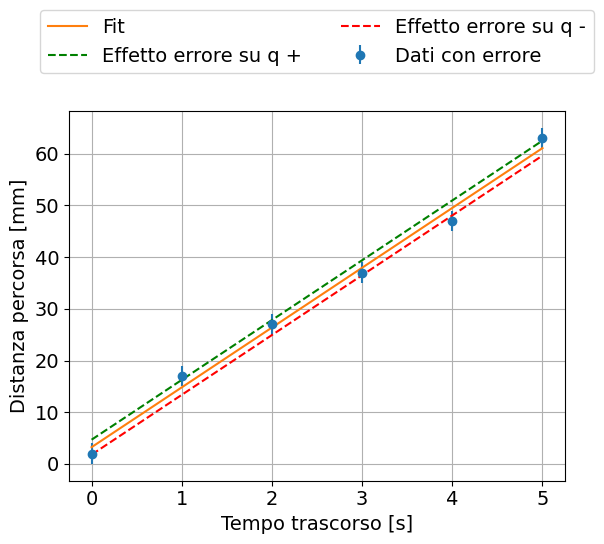

In [12]:
#per esempio posso vedere la fascia di indeterminazione dovuta all'errore su q
s_plus = m*t + (q+sigma_q)
s_minus = m*t + (q-sigma_q)
plt.errorbar(t, s, yerr=sigma_s, fmt='o', label='Dati con errore')

plt.plot(t, s_fit, label='Fit')
plt.plot(t, s_plus, label='Effetto errore su q +', color = "g", ls ="--")
plt.plot(t, s_minus, label='Effetto errore su q -', color = "r", ls ="--")


plt.xlabel('Tempo trascorso [s]')
plt.ylabel('Distanza percorsa [mm]')
plt.legend(loc='upper center',ncol=2, bbox_to_anchor=(0.5, 1.3))
plt.grid(True)
plt.show()

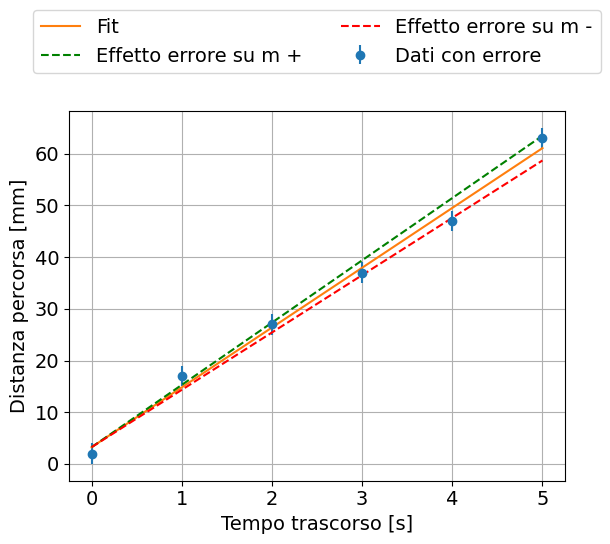

In [13]:
#Analogamnete posso vedere l'effetto dell'errore su m
s_plus = (m+sigma_m) *t + q
s_minus = (m-sigma_m)*t + q
plt.errorbar(t, s, yerr=sigma_s, fmt='o', label='Dati con errore')

plt.plot(t, s_fit, label='Fit')
plt.plot(t, s_plus, label='Effetto errore su m +', color = "g", ls ="--")
plt.plot(t, s_minus, label='Effetto errore su m -', color = "r", ls ="--")


plt.xlabel('Tempo trascorso [s]')
plt.ylabel('Distanza percorsa [mm]')
plt.legend(loc='upper center',ncol=2, bbox_to_anchor=(0.5, 1.3))
plt.grid(True)
plt.show()